In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import scipy.signal as sg
import scipy.fft as ft
import numpy as np

In [2]:
N = 1000               # time range (sec)
dt = 1.0               # time interval (sec)

amp = 1.0              # amplitude
freq = 0.05            # frequency
period = 1./freq       # period
omega = 2.*np.pi*freq  # ang freq
phi = 0.0              # phase
print("amp = ", amp, ", period = ", period)

amp =  1.0 , period =  20.0


Text(0, 0.5, 'ampl.')

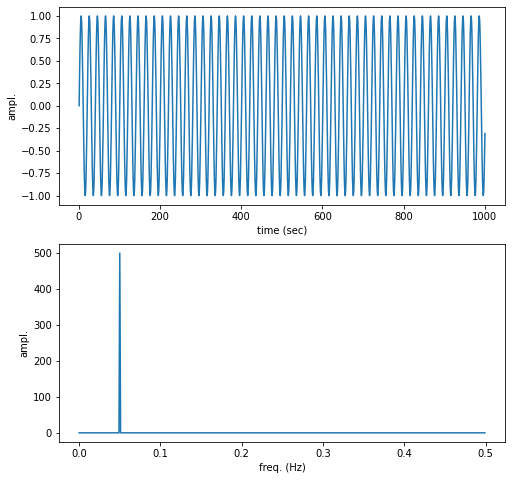

In [11]:
ti = np.linspace( 1, N, num = N, dtype = int )

xi = np.zeros( (N), dtype=float)      # input signal (time domain)
for i in range(N):
    xi[i] = amp*np.sin(omega*i+phi)

fxi = ft.fft(xi)[0:N//2]              # input signal (freq. domain)
faxis = ft.fftfreq(N,1)[0:N//2]

fig,axes = plt.subplots(2,1,figsize = (8,8))

axes[0].plot(ti,xi)
axes[0].set_xlabel("time (sec)")
axes[0].set_ylabel("ampl.")

axes[1].plot(faxis,np.abs(fxi))
axes[1].set_xlabel("freq. (Hz)")
axes[1].set_ylabel("ampl.")


Text(0, 0.5, 'in / out signal')

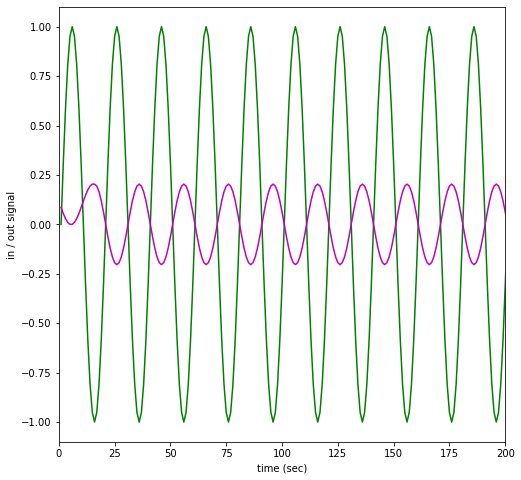

In [35]:
Nex = 21                                        # compare Nex = 1, 3, 11 (odd numbers!)
win = np.repeat([1],Nex) / Nex                  # builds array repeats (arg 2) of array (arg 1)  ( note / iw for average)
yi = sg.convolve( xi, win, mode = "same")       # convolutes array 1 (arg1) with array (arg 2)

fig,axes = plt.subplots(1,1,figsize = (8,8))

axes.plot( ti, xi, 'g-')
axes.plot( ti, yi, 'm-')
axes.set_xlim(0,200)
axes.set_xlabel("time (sec)")
axes.set_ylabel("in / out signal")

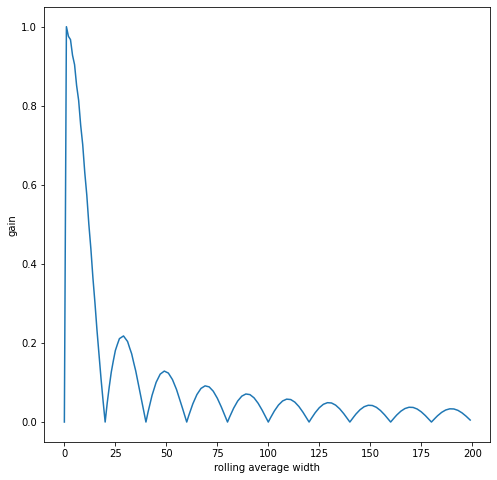

In [27]:
Nw = 200                                        # study filter gain versus rolling average width

gain = np.zeros( (Nw), dtype=float)             # declare arrays for gain versus width
wdth = np.zeros( (Nw), dtype=float)

for iw in range(1,Nw):                            # loop over rolling windows of lengths 1 - N
    win = np.repeat([1],iw) / iw                  # builds array repeats (arg 2) of array (arg 1) ( note / iw for average)
    yiw = sg.convolve( xi, win, mode="same")      # convolutes array 1 (arg1) with array (arg 2) 
    gain[iw] = np.amax(yiw[250:750])              # compute amplitude of output signal versus iw
    wdth[iw] = iw                                

fig,axes = plt.subplots(1,1,figsize = (8,8))

axes.set_xlabel("rolling average width")
axes.set_ylabel("gain")
axes.plot( wdth, gain)

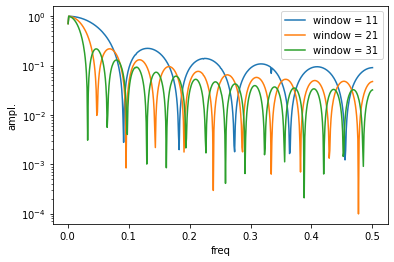

In [43]:
Nw = 3                 # number of window steps
Wmin = 11              # min freq.
Wstep = 10             # freq. step size

Nf = 500               # number of freq. steps
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

xi = np.zeros( (N), dtype=float)
xlo,xhi = 200,800
gain = np.zeros( (Nf), dtype=float) 
freq = np.zeros( (Nf), dtype=float)

for iw in range(Nw):
  for ifr in range(Nf):

      for i in range(N):
          xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)

      win = np.repeat( [1], iw*Wstep+Wmin)
      #win = sg.hann(iw*Wstep+Wmin) 
      #win = sg.hamming(iw*Wstep+Wmin)
      yi = sg.convolve( xi, win) / (iw*Wstep+Wmin)
      gain[ifr] = np.amax(yi[xlo:xhi])
      freq[ifr] = ifr*fstep+fmin
    
  plt.plot( freq, gain,label=f"window = {iw*Wstep+Wmin}")

plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.legend()

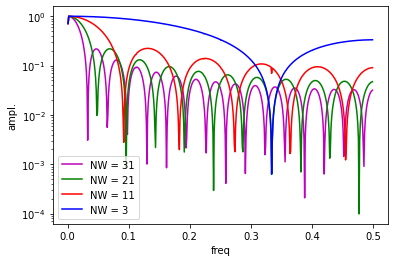

In [37]:
Nw = 31                # study filter gain versus input frequency, fixed Nw

Nf = 499               # number of freq steps
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float) # declare arrays for gain versus freq
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    win = np.repeat([1],Nw)
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'm-',label="NW = 31")

Nw = 21                # study filter gain versus input frequency, fixed Nw

Nf = 499               # number of freq steps
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    win = np.repeat([1],Nw)
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'g-',label="NW = 21")

Nw = 11                # study filter gain versus input frequency, fixed Nw

Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    win = np.repeat([1],Nw)
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'r-',label="NW = 11")

Nw = 3                 # study filter gain versus input frequency, fixed Nw

Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    win = np.repeat([1],Nw)
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
#plt.xlim(0.0,0.1)
plt.plot(freq,gain, 'b-',label="NW = 3")
plt.legend()

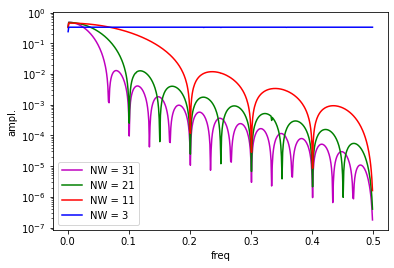

In [6]:
Nw = 31
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hann(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'm-',label="NW = 31")

Nw = 21
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hann(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'g-',label="NW = 21")

Nw = 11
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hann(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'r-',label="NW = 11")

Nw = 3
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hann(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'b-',label="NW = 3")
plt.legend()


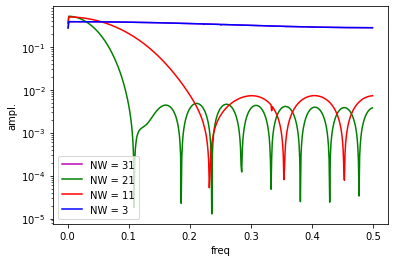

In [7]:
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hamming(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'm-',label="NW = 31")

Nw = 21
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hamming(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'g-',label="NW = 21")

Nw = 11
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hamming(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'r-',label="NW = 11")

Nw = 3
Nf = 499
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step size

gain = np.zeros( (Nf), dtype=float)
freq = np.zeros( (Nf), dtype=float)

for ifr in range(Nf):
    xi = np.zeros( (N), dtype=float)
    for i in range(N):
        xi[i] = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*i+phi)
    #win = np.repeat([1],Nw)
    win = sg.hamming(Nw)    
    yi = sg.convolve( xi, win) / Nw
    gain[ifr] = np.amax(yi[200:800])
    freq[ifr] = ifr*fstep+fmin
    
plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.plot(freq,gain, 'b-',label="NW = 3")
plt.legend()

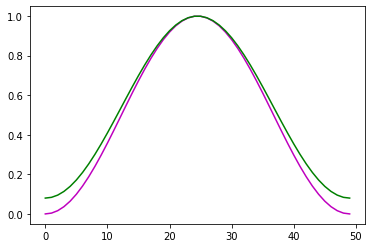

In [8]:
Nw = 50
winhann = sg.hann(Nw)
plt.plot(winhann,"m-")

Nw = 50
winhamming = sg.hamming(Nw)    
plt.plot(winhamming,"g-")